In [22]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import tensorflow as tf
from tensorflow.spectral import dct, idct 
from tensorflow.contrib.framework import argsort

from sklearn.metrics import mean_squared_error

In [32]:
N=100
xx=np.random.normal(0,0.05, N)
xx=np.expand_dims(xx, axis=0) # For the placeholder

## Placeholders
x= tf.placeholder(tf.float32, shape=(1,N))

## Dicrete cosine function 
x_dct=dct(x,2, norm='ortho')
x_dct=tf.squeeze(x_dct)

org_x_dct=tf.identity(x_dct)
## We add (-) for sorting the dct coeffs in a descending order and returning 
## the indices for those ordered coeffs. 
indx=argsort(-tf.abs(x_dct))


#sess=tf.Session()
#sess.run(org_x_dct,{x:xx})


In [41]:
i=tf.constant(0)
def cond(i):
    #a=tf.norm(tf.gather(x_dct, tf.gather(indx, tf.range(i))))
    a=tf.norm(tf.gather(x_dct, indx[0:i]))

    b=tf.norm(x_dct)
    return tf.less(a/b,0.9)


def body(i):
    return tf.add(i,1)



k=tf.while_loop(cond, body, [i])
k=tf.subtract(k,1)  # We should subtract 1 from the output of the loop as i is inceased by 1 before we check the condition. 
sess=tf.Session()

sess.run(k, {x:xx})  # This is the number of coefficients (do not bother with the index)


33

In [42]:
# Let us verify that
#a=tf.norm(tf.gather(x_dct, tf.gather(indx, tf.range(res))))
a=tf.norm(tf.gather(x_dct, indx[0:k]))

b=tf.norm(x_dct)
alpha=tf.divide(a,b)

sess.run(alpha, {x:xx})

0.8960608

In [43]:
# See appendix
indices=tf.expand_dims(indx[0:k],-1)

updates=tf.squeeze(tf.gather(x_dct, indices))
shape = tf.constant([N])

#sess.run(updates,{x:xx})
#np.shape(ff)

In [44]:
scatter = tf.scatter_nd(indices, updates, shape)
#sess.run(scatter,{x:xx})
#np.shape(ff)

In [45]:
reco_x=idct(scatter,2, norm='ortho')

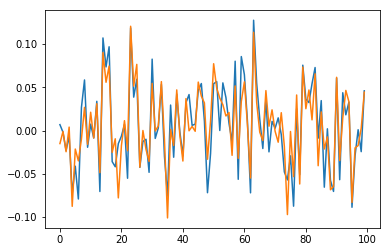

In [46]:
plt.plot(xx[0])
plt.plot(sess.run(reco_x, {x:xx}))
plt.show()